In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import chardet
file_path='IMDb Movies India.csv'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

In [3]:
df = pd.read_csv(file_path, encoding=result['encoding'])
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.duplicated().sum()

6

In [6]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

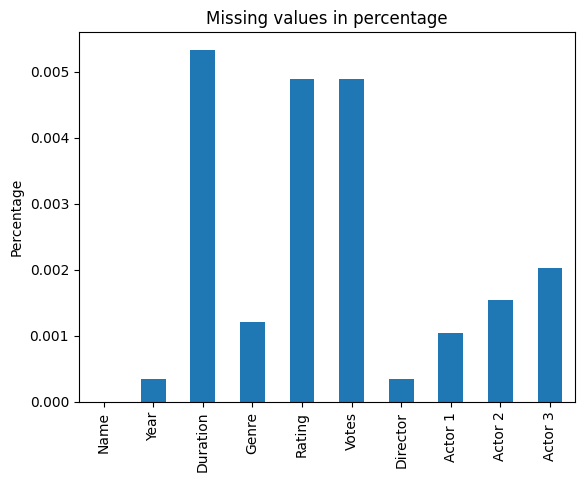

In [8]:
missing_vals_percentage=(df.isnull().sum())/(len(df)*100)
missing_vals_percentage.plot(kind='bar', title='Missing values in percentage', ylabel='Percentage', legend=False)
plt.show()

In [9]:
df.drop(['Name', 'Duration'], axis=1, inplace=True)
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer()
df['Rating']=imputer1.fit_transform(df[['Rating']])

In [10]:
imputer2=SimpleImputer(strategy='most_frequent')
cols=df.drop(['Rating'], axis=1).columns
for col in cols:
    df[[col]]=imputer2.fit_transform(df[[col]])

In [11]:
df.isnull().sum()

Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,(2019),Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...
15498,(1988),Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15499,(1999),"Action, Drama",4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15500,(2005),Action,5.841621,8,Kiran Thej,Sangeeta Tiwari,Rekha,Pran
15501,(1988),Action,5.841621,8,Jayant Desai,Ashok Kumar,Rekha,Pran


In [13]:
df.duplicated().sum()

416

In [14]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,(2019),Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...
15082,(1989),"Action, Crime, Drama",5.800000,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15083,(1988),Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15084,(1999),"Action, Drama",4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15085,(2005),Action,5.841621,8,Kiran Thej,Sangeeta Tiwari,Rekha,Pran


In [17]:
df['Year']= df['Year'].str.strip('()')
df['Year']=df['Year'].astype(int)
df['Votes'] = df['Votes'].str.extract(pat='(\d+)', expand=False)
df['Votes']= df['Votes'].astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_18336\3369418937.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Votes'] = df['Votes'].str.extract(pat='(\d+)', expand=False)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15087 entries, 0 to 15086
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15087 non-null  int32  
 1   Genre     15087 non-null  object 
 2   Rating    15087 non-null  float64
 3   Votes     15087 non-null  int32  
 4   Director  15087 non-null  object 
 5   Actor 1   15087 non-null  object 
 6   Actor 2   15087 non-null  object 
 7   Actor 3   15087 non-null  object 
dtypes: float64(1), int32(2), object(5)
memory usage: 825.2+ KB


In [19]:
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...
15082,1989,"Action, Crime, Drama",5.800000,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15083,1988,Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15084,1999,"Action, Drama",4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15085,2005,Action,5.841621,8,Kiran Thej,Sangeeta Tiwari,Rekha,Pran


In [20]:
# df[['Genre 1', 'Genre 2', 'Genre 3']]=df['Genre'].str.split(',', expand=True)
# df.drop(['Genre'], axis=1, inplace=True)
# df

In [21]:
from sklearn.preprocessing import TargetEncoder
encoder=TargetEncoder()
cols=df.drop(['Year', 'Rating'], axis=1).columns
for col in cols:
    df[[col]]=np.round(encoder.fit_transform(X=df[[col]], y=df['Rating']), 1)

In [22]:
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,6.0,5.841621,5.8,5.7,5.8,5.5,5.8
1,2019,6.0,7.000000,5.8,5.8,6.7,5.8,5.8
2,2021,6.3,5.841621,5.8,5.8,6.3,6.7,5.8
3,2019,5.8,4.400000,6.0,5.8,5.7,5.8,4.5
4,2010,6.0,5.841621,5.8,6.1,6.8,6.0,5.4
...,...,...,...,...,...,...,...,...
15082,1989,5.7,5.800000,6.1,5.8,6.2,5.8,5.7
15083,1988,5.6,4.600000,5.6,4.7,6.1,5.8,5.8
15084,1999,5.5,4.500000,7.3,5.3,5.5,4.7,5.9
15085,2005,5.6,5.841621,5.8,5.8,5.8,5.9,5.9


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15087 entries, 0 to 15086
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15087 non-null  int32  
 1   Genre     15087 non-null  float64
 2   Rating    15087 non-null  float64
 3   Votes     15087 non-null  float64
 4   Director  15087 non-null  float64
 5   Actor 1   15087 non-null  float64
 6   Actor 2   15087 non-null  float64
 7   Actor 3   15087 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 884.1 KB


In [24]:
X=df.drop(['Rating'], axis=1)
X

,Year,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,6.0,5.8,5.7,5.8,5.5,5.8
1,2019,6.0,5.8,5.8,6.7,5.8,5.8
2,2021,6.3,5.8,5.8,6.3,6.7,5.8
3,2019,5.8,6.0,5.8,5.7,5.8,4.5
4,2010,6.0,5.8,6.1,6.8,6.0,5.4
...,...,...,...,...,...,...,...
15082,1989,5.7,6.1,5.8,6.2,5.8,5.7
15083,1988,5.6,5.6,4.7,6.1,5.8,5.8
15084,1999,5.5,7.3,5.3,5.5,4.7,5.9
15085,2005,5.6,5.8,5.8,5.8,5.9,5.9


In [25]:
y=df['Rating']
y

0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15082    5.800000
15083    4.600000
15084    4.500000
15085    5.841621
15086    6.200000
Name: Rating, Length: 15087, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
regressor=xgb.XGBRegressor(eval_metric='rmsle')
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015, 0.02]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [28]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
pred=regressor.predict(X_test)
pred

array([5.9161563, 5.8711424, 5.858334 , ..., 5.337008 , 5.872184 ,
       4.9860287], dtype=float32)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred=pred)

0.2307264127050649

In [31]:
feature_scores = pd.Series(regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Director    0.336066
Actor 1     0.154061
Genre       0.113116
Votes       0.103551
Actor 2     0.101728
Actor 3     0.098706
Year        0.092772
dtype: float32

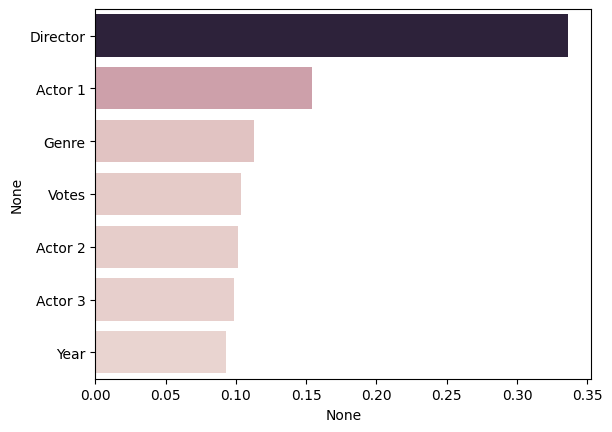

In [32]:
sns.barplot(x=feature_scores, y=feature_scores.index, hue=feature_scores, legend=False)
plt.show()